# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [30]:
import numpy as np
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
                   
y = np.array([[0,0,1,1]]).T

In [31]:
np.random.seed(1)
 
# syn0 第一層權值
# syn1 第二層權值

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

syn0_history = [syn0]
syn1_history = [syn1]
 
      



神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [32]:
for j in range(10000):
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))  
    l2_error = y - l2
 
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))

    l2_delta = l2_error*nonlin(l2,deriv=True)

    l1_error = y - l1
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l1_error))))

    l1_delta = l1_error * nonlin(l1,True)
 
    syn1 += np.dot(l1.T,l2_delta)
    syn0 += np.dot(l0.T,l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)     
print("\n\n")
print("Output After Training: l1")
print(l1)
print("\n\n")
print("Output After Training: l2")
print(l2)

L2_Error:0.4685343254580603
L1_Error:0.5280904017905788



Output After Training: l1
[[0.00967022 0.00967012 0.00967177 0.00967097]
 [0.00786296 0.00786136 0.00786459 0.00786399]
 [0.99359177 0.9935933  0.99359037 0.99359086]
 [0.9921162  0.99211658 0.99211487 0.99211551]]



Output After Training: l2
[[0.50814095]
 [0.50661888]
 [0.96597979]
 [0.96581602]]


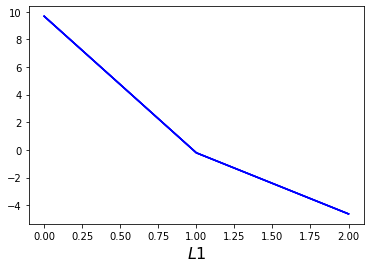

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(syn0_history[0], ms=3, lw=1.5, color='blue')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

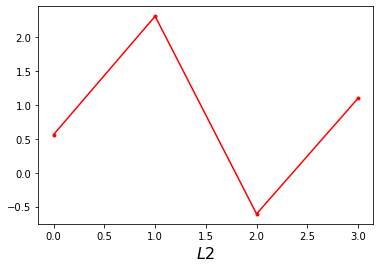

In [34]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='red')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()